In [1]:
import data_preparation_script as prep
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [2]:
base = "C:/Users/alina/Master-Projects/applied-dl/applied-dl-drumsticks/data_preparation"
prep.OUTPUT_FOLDER = base + "/test/out"
prep.INPUT_FOLDER = base + "/test/in"
prep.ANNOTATIONS = base + "/test/annotation-test.xml"

In [3]:
def readImage(dir):
    imgs = []
    for filename in os.listdir(dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(dir +"/"+ filename)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            imgs.append(img)
    return imgs

Copied and flipped "frame_000000.jpg" to "C:/Users/alina/Master-Projects/applied-dl/applied-dl-drumsticks/data_preparation/test/out/frame_000000_flip.jpg"


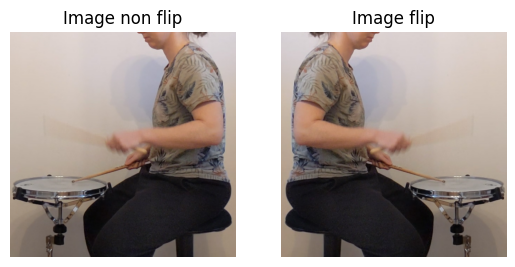

In [4]:
# visualize flipped and non fliped images

prep.flip_images(prep.INPUT_FOLDER, prep.OUTPUT_FOLDER)

img_flip = readImage(prep.OUTPUT_FOLDER)[0]
img_non_flip = readImage(prep.INPUT_FOLDER)[0]

plt.subplot(1, 2, 1) 
plt.imshow(img_non_flip)
plt.title("Image non flip") 
plt.axis('off')     

plt.subplot(1, 2, 2)  
plt.imshow(img_flip)
plt.title("Image flip") 
plt.axis('off')
plt.show()

box width is 280.0
box height is 72.0
box width is 221.0
box height is 66.0


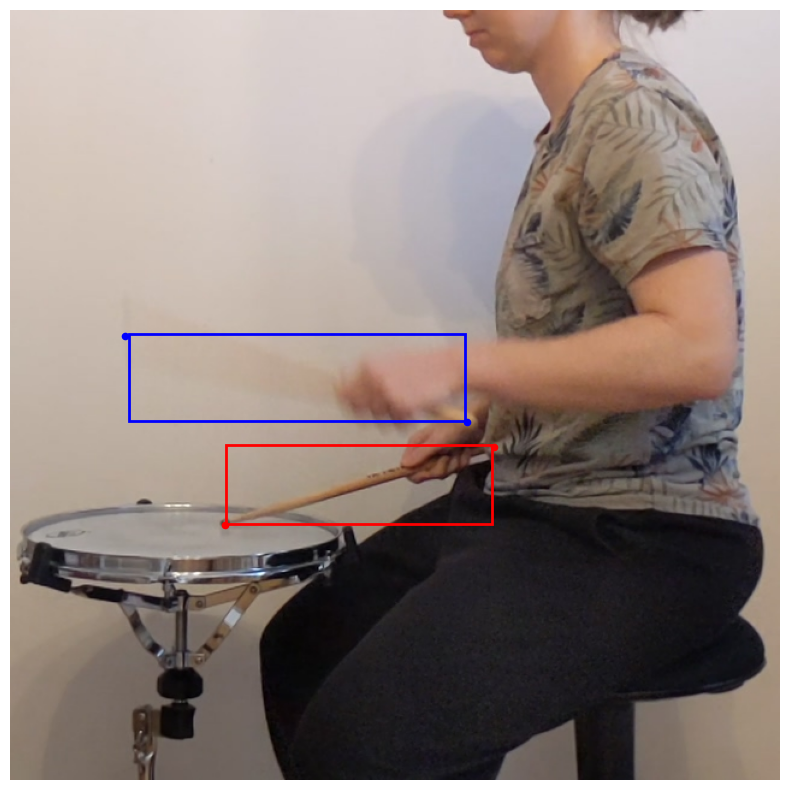

box width is 280.0
box height is 72.0
box width is 221.0
box height is 66.0


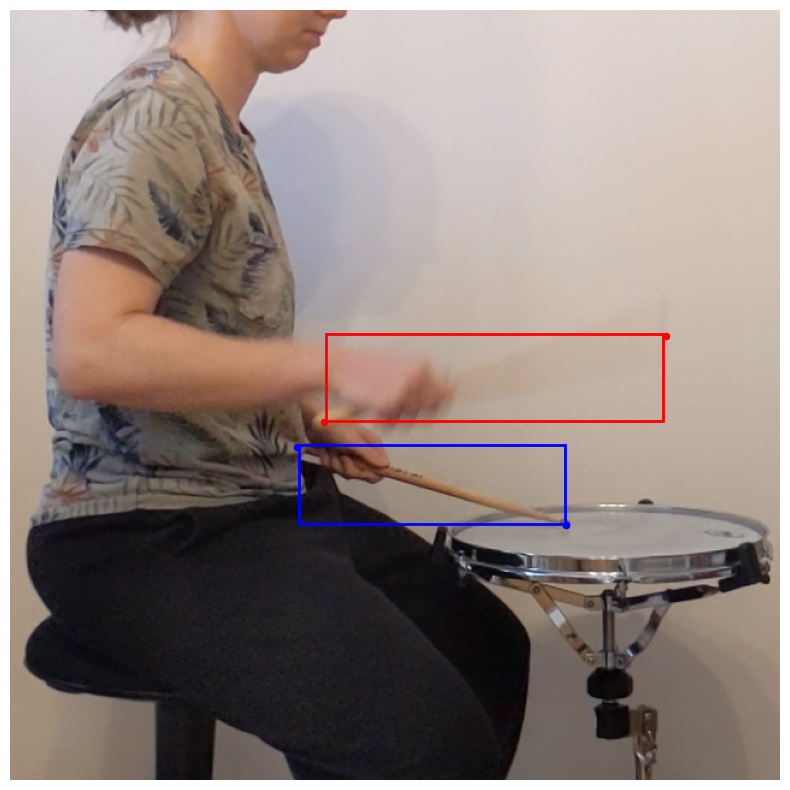

In [5]:
# visualize flipped and non flipped bounding boxes

def parse_line(line, img_width, img_height):
    parts = line.split()
    cls = int(parts[0])  # Class label
    x_center = float(parts[1]) * img_width
    y_center = float(parts[2]) * img_height
    box_width = float(parts[3]) * img_width
    box_height = float(parts[4]) * img_height

    print(f"box width is {box_width}")
    print(f"box height is {box_height}")
    # Bounding box coordinates
    x_min = x_center - box_width / 2
    y_min = y_center - box_height / 2
    x_max = x_center + box_width / 2
    y_max = y_center + box_height / 2

    # Keypoints (x, y) pairs
    keypoints = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) 
                 for i in range(5, len(parts), 2)]

    return cls, (x_min, y_min, x_max, y_max), keypoints


def show_annotations(img, label_path, img_height, img_width):
    with open(label_path, 'r') as file:
        lines = file.readlines()

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)

    for line in lines:
        cls, bbox, keypoints = parse_line(line, img_width, img_height)
        x_min, y_min, x_max, y_max = bbox

    # bounding box
        color = 'blue' if cls == 0 else 'red'
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                             linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

    #  keypoints
        for kp in keypoints:
            ax.scatter(kp[0], kp[1], color=color, s=20)

    plt.axis('off')
    plt.show()

# show non flipped
prep.create_labels(prep.OUTPUT_FOLDER, prep.ANNOTATIONS)
img = readImage(prep.INPUT_FOLDER)[0]
img_height, img_width, _ = img.shape
show_annotations(img, prep.OUTPUT_FOLDER + "/frame_000000.txt", img_height, img_width)

# show flipped
prep.create_labels(prep.OUTPUT_FOLDER, prep.ANNOTATIONS, flip=True)
img = readImage(prep.OUTPUT_FOLDER)[0]
img_height, img_width, _ = img.shape
show_annotations(img, prep.OUTPUT_FOLDER + "/frame_000000_flip.txt", img_height, img_width)

